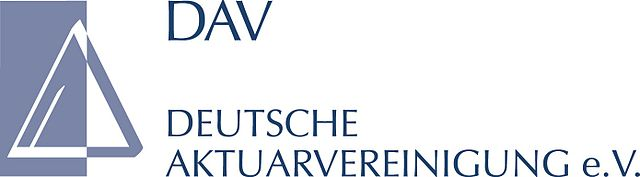

<p style="font-size:19px; text-align:left; margin-top: 15px; margin-bottom: 5px">Working Group <i>Explainable Artificial Intelligence</i></p>
<p style="font-size:25px; text-align:left; margin-bottom: 15px"><b>On Model-Agnostic Explainability Methods for Binary Classification Problems</b></p>

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">1. Introduction</h1>
<hr style="border:1.5px solid black; margin-bottom: 15px;"> </hr>

The main goal of this notebook is to provide the reader with a variety of methods for explaining the functioning and the predictions of machine learning models employed in a binary classification problem. In doing so, we aim at providing insights into how a given machine learning model works globally as well as how specific predictions are accomplished. The reader is motivated to use—or at least get inspired by—the approaches and code snippets presented in the further course of this article.

Throughout, we analyze an illustrative and publicly available [[1]](#section_references) dataset of passengers on the maiden voyage of the ocean liner _Titanic_. The binary classification problem of interest is given by predicting whether a passenger of the Titanic survived or not based on personal information such as gender, age or ticket costs. Our main focus is not on maximizing the prediction quality of the underlying machine learning models but on explaining the predictions derived from such algorithms. To this end, various model-agnostic methods (i.e., methods that are applicable to any fitted machine learning model) are described and employed on different machine learning schemes, such as tree-based models or deep learning models.

The remainder of this notebook is organized as follows. In Section 2, we perform common data analysis and preprocessing steps on the Titanic dataset to become familiar with its features and their influence on the target as well as to prepare the data. Section 3 is devoted to the fitting of several machine learning models to our classification problem. In particular, we consider a Random Forest model, an XGBoost model and an Artificial Neural Network. In Section 4, several global model-agnostic methods for the explanation of a given model in its totality are presented. To be more precise, we study partial dependence plots (Subsection 4.1), global surrogate models (Subsection 4.2) and accumulated local effects (Subsection 4.3). In contrast to explaining the global behavior of a machine learning model, Section 5 contains model-agnostic methods that describe a model locally, i.e., give explanations of how the predictions of single data instances are derived by the model. In particular, we consider the methods SHAP (Subsection 5.1), LIME (Subsection 5.2) and ICE (Subsection 5.3). The concluding Section 6 finishes our notebook by presenting a short summary as well as an outlook on future work. In the Appendix, we reimplemented selected model-agnostic methods in order to give insight into their coding.c

<h1 style="font-size:18px; font-weight:bold; margin-top: 15px;">2. Analysis and Preprocessing of the Underlying Dataset</h1>
<hr style="border:1.5px solid black; margin-bottom: 15px;"> </hr>

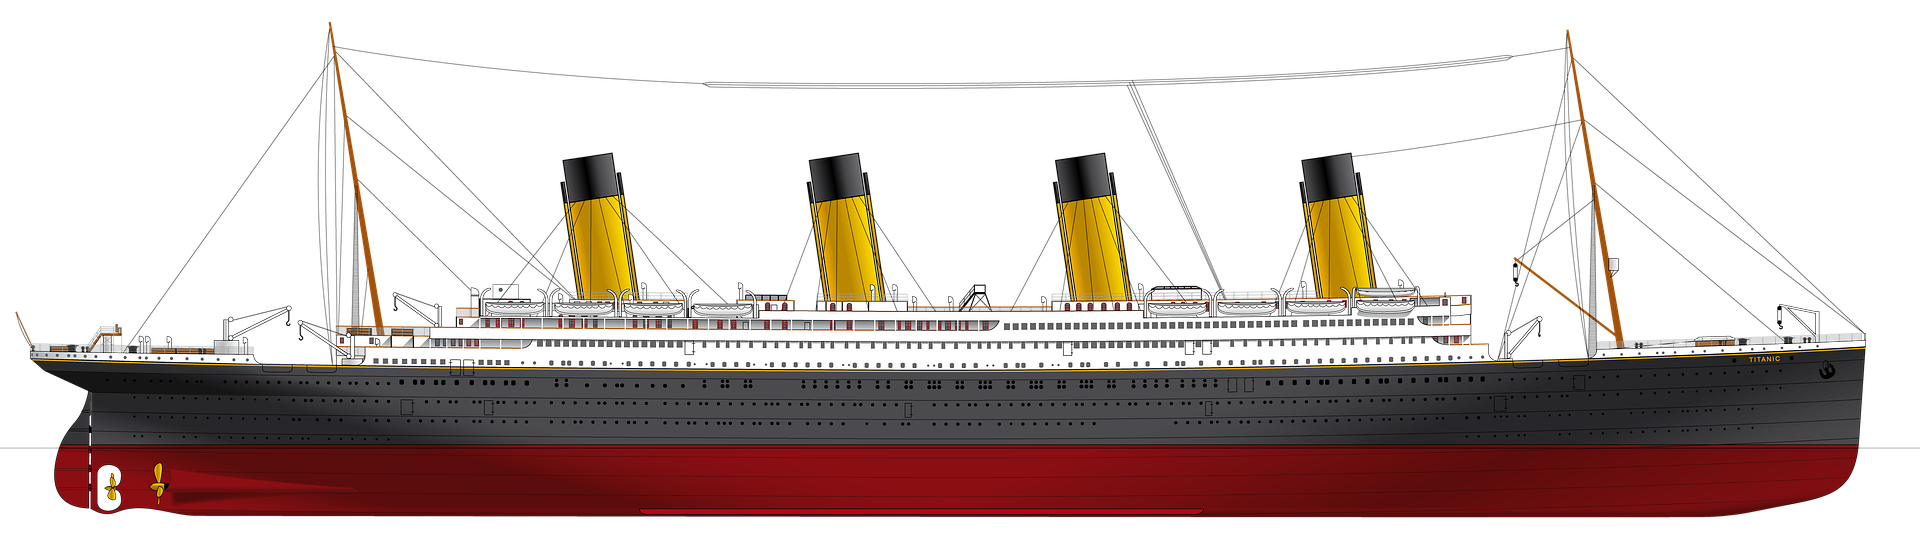

To obtain a first impression of the Titanic dataset, a very basic data analysis as well as some common data preprocessing steps are conducted. At the beginning of this, we read in the dataset and display its first ten entries.

In [2]:
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [3]:
library(dplyr)


Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


